# Ham Or Spam

In [41]:
#!pip install wordcloud

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df=pd.read_csv('/kaggle/input/day7-msai/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
df=df[['v1','v2']]
df.columns=['class','text']
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='class', ylabel='count'>

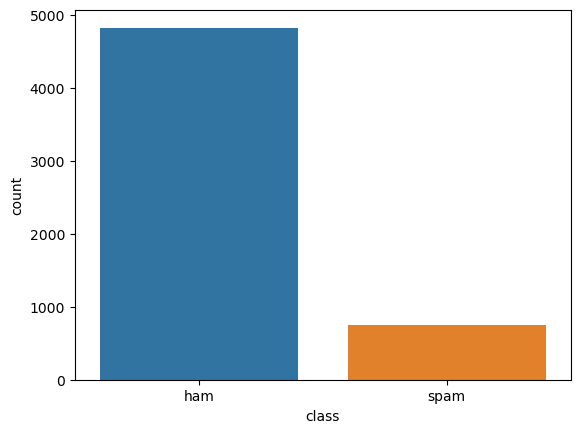

In [45]:
sns.countplot(x=df['class'])

df['class'].value_counts()

In [46]:
d={'ham':0,'spam':1}
df['class']=df['class'].map(d)
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# text cleaning

In [47]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\r','')
df['text']=df['text'].str.replace('\d+','')

In [48]:
#pip install wordcloud

In [49]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [50]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('/kaggle/input/image-cld/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data)) # joining or combing the text data,weuse ' to put aspace,'' this will basically cjoin the datas to a single large text.'
    plt.imshow(wc)
    plt.axis('off')

In [51]:
ham=df[df['class']==0]['text']
spam=df[df['class']==1]['text']

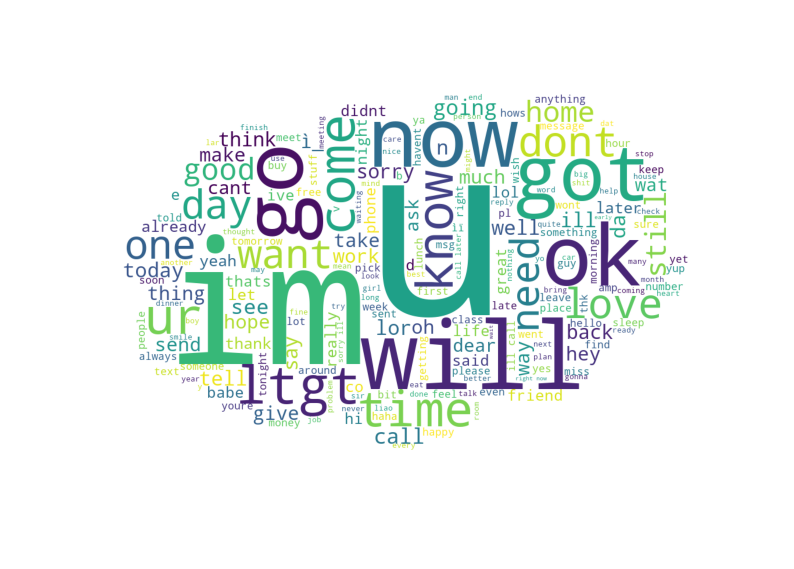

In [52]:
wc(ham,'white')

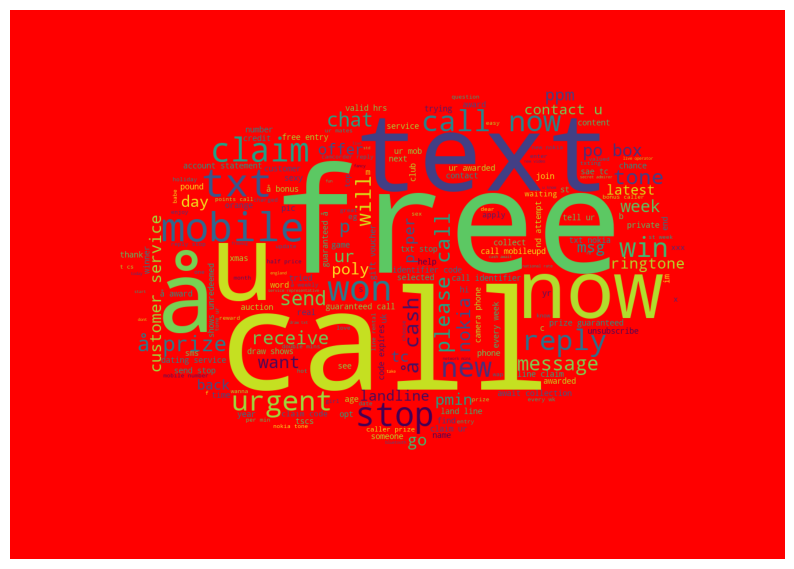

In [53]:
wc(spam,'red')

In [54]:
x=df['text']
y=df['class']

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [56]:
def lemma(text):
    words=TextBlob(text).words
    return[pr.stem(word) for word in words]

In [57]:

vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemma)
x=vect.fit_transform(x)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
nb=MultinomialNB()
nb.fit(x_train,y_train)
prednb=nb.predict(x_test)
accuracy_score(prednb,y_test)

0.9766816143497757